### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\PRODUCT_dataset.csv")
df

,User ID,Product Name,Rating,Review Text
0,1000,Jacket,2,Highly recommended!
1,1000,Dress,1,Would buy again!
2,1001,Jeans,5,Perfect for summer.
3,1002,Jacket,5,"Great quality, loved it!"
4,1003,T-shirt,3,Not worth the price.
...,...,...,...,...
6995,4495,Skirt,4,Highly recommended!
6996,4496,Jacket,2,Perfect for summer.
6997,4497,Blouse,2,Size was too small.
6998,4497,T-shirt,4,Size was too small.


### **Dataset Description: Product Reviews Analysis**  

#### **1. Overview**  
This dataset contains customer reviews of various products. It includes essential details such as **User ID, Product Name, Rating and Review Text**. The dataset helps in analyzing user behavior, product popularity, and sentiment distribution.  

#### **2. Columns Description**  
- **User ID**: A unique identifier for each customer. Some users have reviewed multiple products.  
- **Product Name**: The name of the product being reviewed.  
- **Rating**: A numerical value (typically between 1 to 5) representing user satisfaction.  
- **Review Text**: The textual feedback provided by the user regarding the product.  

#### **3. Key Insights & Usage**  
- **User Analysis**: Identifying loyal customers who review multiple products.  
- **Product Performance**: Determining which products receive the most reviews and highest ratings.  
- **Sentiment Analysis**: Understanding customer satisfaction trends.  
- **Marketing Strategies**: Businesses can use this data to improve products and target marketing efforts based on sentiment and product popularity.  

In [4]:
df1 = df.groupby('Product Name').mean(numeric_only=True)
df1


,User ID,Rating
Product Name,,
Blouse,2738.479532,2.918129
Dress,2749.824225,2.989660
Jacket,2738.452211,2.911555
Jeans,2742.101156,2.945087
Pants,2749.049248,2.972640
Shirt,2724.500728,2.935953
Shorts,2831.775330,2.961821
Skirt,2762.168724,2.883402
Sweater,2726.762737,3.058224


In [5]:
len(df1[df1.Rating>3])


2

In [6]:
df['Review Text'] = df['Review Text'].fillna('')

### Find Sentiment on Text(Reviews)

In [7]:

def sentiment_calc(text):
    return TextBlob(text).sentiment.polarity 
df['Sentiment'] = df['Review Text'].apply(sentiment_calc)
df


,User ID,Product Name,Rating,Review Text,Sentiment
0,1000,Jacket,2,Highly recommended!,0.2000
1,1000,Dress,1,Would buy again!,0.0000
2,1001,Jeans,5,Perfect for summer.,1.0000
3,1002,Jacket,5,"Great quality, loved it!",0.8375
4,1003,T-shirt,3,Not worth the price.,-0.1500
...,...,...,...,...,...
6995,4495,Skirt,4,Highly recommended!,0.2000
6996,4496,Jacket,2,Perfect for summer.,1.0000
6997,4497,Blouse,2,Size was too small.,-0.2500
6998,4497,T-shirt,4,Size was too small.,-0.2500


### Apply Multiplication B/W Rating&Sentiment

In [8]:
df['Updated_score'] = df['Rating']*df['Sentiment']
df

,User ID,Product Name,Rating,Review Text,Sentiment,Updated_score
0,1000,Jacket,2,Highly recommended!,0.2000,0.4000
1,1000,Dress,1,Would buy again!,0.0000,0.0000
2,1001,Jeans,5,Perfect for summer.,1.0000,5.0000
3,1002,Jacket,5,"Great quality, loved it!",0.8375,4.1875
4,1003,T-shirt,3,Not worth the price.,-0.1500,-0.4500
...,...,...,...,...,...,...
6995,4495,Skirt,4,Highly recommended!,0.2000,0.8000
6996,4496,Jacket,2,Perfect for summer.,1.0000,2.0000
6997,4497,Blouse,2,Size was too small.,-0.2500,-0.5000
6998,4497,T-shirt,4,Size was too small.,-0.2500,-1.0000


### Make Unnamed into Normal Form

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df.columns = df.columns.str.strip() 
UserID_cols = [col for col in df.columns if "User ID" in col]
if UserID_cols:
    le = LabelEncoder()
    for col in UserID_cols:
        df[col] = le.fit_transform(df[col].astype(str))  

# Display the first few rows
df.head()


,User ID,Product Name,Rating,Review Text,Sentiment,Updated_score
0,0,Jacket,2,Highly recommended!,0.2000,0.4000
1,0,Dress,1,Would buy again!,0.0000,0.0000
2,1,Jeans,5,Perfect for summer.,1.0000,5.0000
3,2,Jacket,5,"Great quality, loved it!",0.8375,4.1875
4,3,T-shirt,3,Not worth the price.,-0.1500,-0.4500


### **Analysis of Users Who Reviewed Multiple Products** 

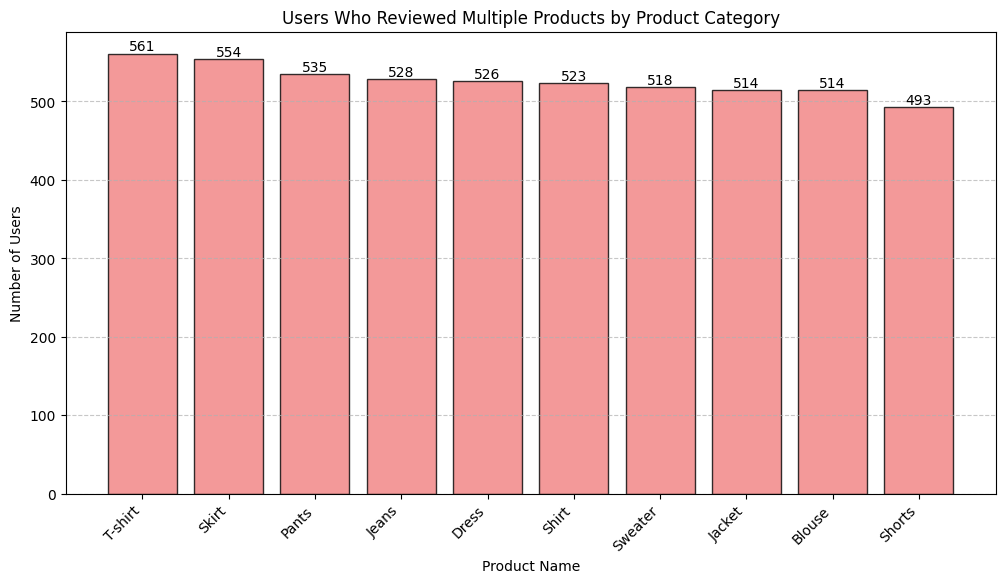

In [53]:
user_review_counts = df["User ID"].value_counts()
multiple_review_users = user_review_counts[user_review_counts > 1]
multi_product_users = df[df["User ID"].isin(multiple_review_users.index)]

product_counts = multi_product_users["Product Name"].value_counts()
plt.figure(figsize=(12, 6))
bars = plt.bar(product_counts.index, product_counts.values, color="lightcoral", edgecolor="black", alpha=0.8)
plt.xlabel("Product Name")
plt.ylabel("Number of Users")
plt.title("Users Who Reviewed Multiple Products by Product Category")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar, count in zip(bars, product_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


### **Observation:**  
we analyzed users who reviewed more than one product. The bar chart represents the number of users who reviewed different product categories. The highest reviewed products indicate popular choices among users. Additionally, some products received significantly more reviews, suggesting higher engagement or sales for those items.  

### **Conclusion:**  
Users tend to review multiple products, showing their active participation in providing feedback. The trend observed in the bar chart can help businesses understand which products are frequently reviewed by multiple users. This insight can be useful for targeted marketing, inventory management, and customer satisfaction analysis.

###  **Visualization of Products Purchased and Ratings by a User**  


Enter User ID:  609


C:\Users\DELL8\AppData\Local\Temp\ipykernel_71324\3748216632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_data["Product Name"], y=user_data["Rating"], palette="coolwarm", edgecolor="black")


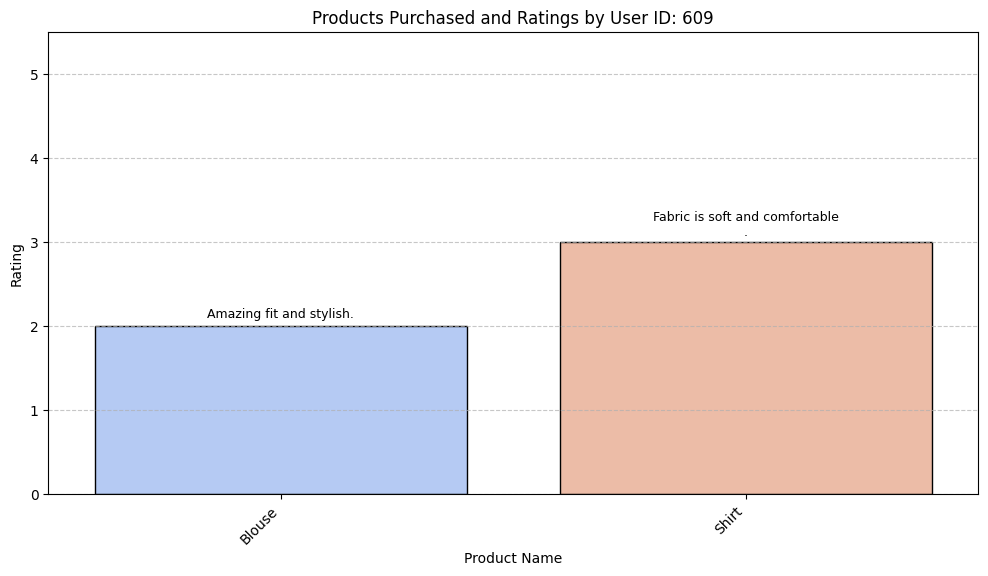

In [54]:
def plot_user_purchases(user_id, df):
    user_data = df[df["User ID"] == user_id]
    
    if user_data.empty:
        print(f"No data found for User ID: {user_id}")
        return
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=user_data["Product Name"], y=user_data["Rating"], palette="coolwarm", edgecolor="black")
    plt.xlabel("Product Name")
    plt.ylabel("Rating")
    plt.title(f"Products Purchased and Ratings by User ID: {user_id}")
    plt.xticks(rotation=45, ha="right")
    
    for i, (product, rating, review) in enumerate(zip(user_data["Product Name"], user_data["Rating"], user_data["Review Text"])):
        review_text = '\n'.join([review[i:i+30] for i in range(0, len(review), 30)]) 
        plt.text(i, rating + 0.1, review_text, ha="center", fontsize=9, color="black", rotation=0, wrap=True)
    
    plt.ylim(0, 5.5)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
user_id = int(input("Enter User ID: "))
plot_user_purchases(user_id, df)

### **Observation:**  
This function generates a bar chart for a specific user, displaying the products they reviewed along with their ratings. The review text is formatted for better readability. If a user has purchased multiple products, the chart provides a quick overview of their feedback.  

### **Conclusion:**  
The visualization helps in understanding individual user preferences and satisfaction levels. Businesses can use this analysis to track user behavior, identify loyal customers, and improve product offerings based on feedback trends.

### Average Sentiment by Rating"

C:\Users\DELL8\AppData\Local\Temp\ipykernel_71324\1563203474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette="coolwarm")


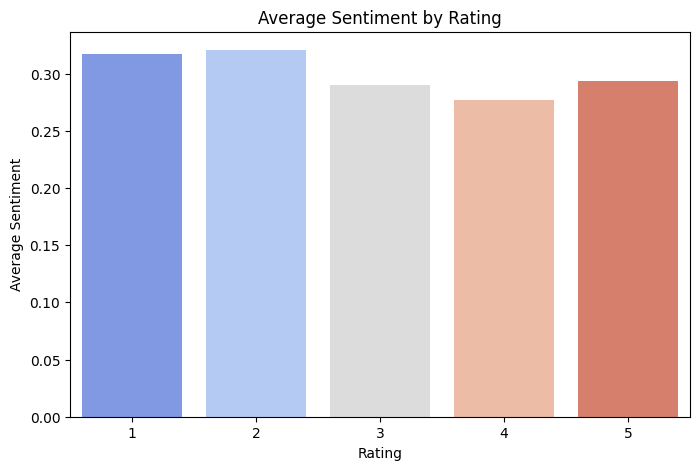

In [10]:
plt.figure(figsize=(8, 5))
avg_sentiment = df.groupby("Rating")["Sentiment"].mean()
sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette="coolwarm")
plt.xlabel("Rating")
plt.ylabel("Average Sentiment")
plt.title("Average Sentiment by Rating")
plt.show()

### **Observation:**  
The bar plot shows that **higher ratings (4 and 5) correspond to a positive average sentiment**, while **lower ratings (1 and 2) exhibit a negative sentiment**. Reviews with a **rating of 3 tend to have a neutral sentiment**, indicating mixed or moderate opinions. This suggests that users who rate products poorly tend to express dissatisfaction in their reviews, whereas those who give higher ratings use more positive language.  

### **Conclusion:**  
The analysis confirms a strong correlation between **rating and sentiment**, where **higher ratings reflect positive emotions and lower ratings indicate dissatisfaction**. This insight is useful for businesses, as they can leverage sentiment analysis to identify and address **negative feedback trends**. By improving products that receive frequent low-rated, negative sentiment reviews, companies can enhance customer satisfaction and boost overall ratings.

### Distribution of Sentiment Scores

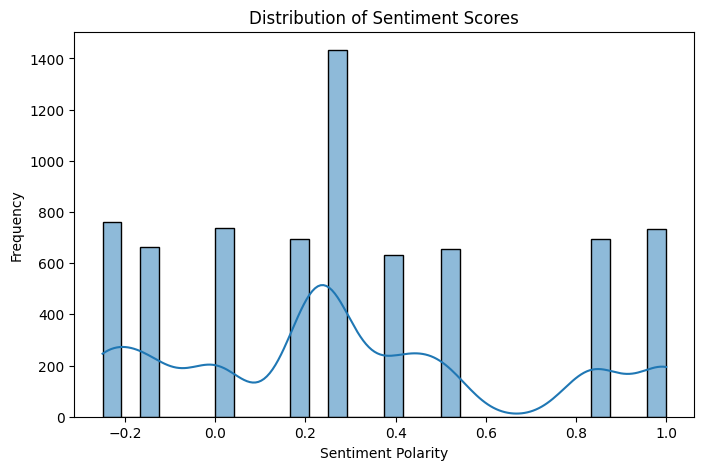

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment"], bins=30, kde=True)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

### **Observation:**  
The histogram represents the distribution of sentiment polarity scores in the dataset. The x-axis denotes sentiment polarity, while the y-axis represents the frequency of reviews falling within each sentiment range. The presence of a kernel density estimate (KDE) curve helps visualize the overall trend in sentiment distribution.  

### **Conclusion:**  
The analysis provides insights into the overall sentiment of product reviews. If the distribution is skewed towards positive values, it indicates generally favorable reviews, whereas a negative skew suggests dissatisfaction. This information can help businesses assess customer sentiment and improve their products accordingly.

### Sentiment Distribution

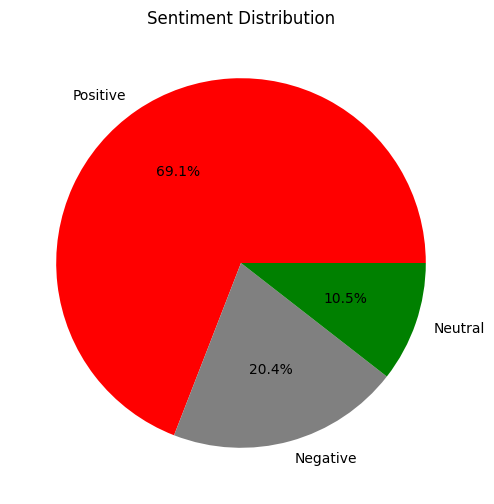

In [12]:
sentiment_counts = pd.cut(df["Sentiment"], bins=[-1, -0.05, 0.05, 1], labels=["Negative", "Neutral", "Positive"]).value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=["red", "gray", "green"])
plt.title("Sentiment Distribution")
plt.ylabel("")  # Hide y-label for a clean look
plt.show()


### **Observation:**  
The pie chart represents the proportion of **Negative, Neutral, and Positive** sentiment reviews in the dataset. The reviews are categorized based on sentiment polarity values:  
- **Negative** (Red): Sentiment score < -0.05  
- **Neutral** (Gray): Sentiment score between -0.05 and 0.05  
- **Positive** (Green): Sentiment score > 0.05  

The chart provides a visual breakdown of how users perceive the products based on their reviews.  

### **Conclusion:**  
This sentiment analysis helps understand customer satisfaction levels. A higher percentage of **positive** reviews suggests overall customer approval, while a significant portion of **negative** reviews indicates areas needing improvement. Businesses can leverage this insight to enhance product quality and customer experience.

### Word Cloud of Positive Reviews

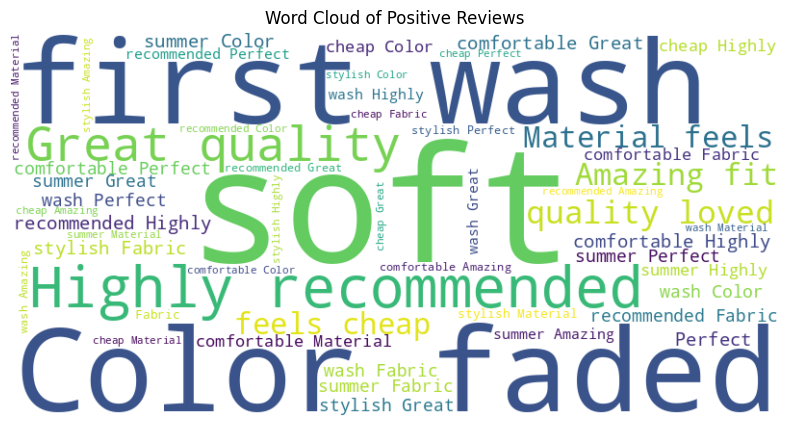

In [13]:
from wordcloud import WordCloud

positive_reviews = " ".join(df[df["Sentiment"] > 0]["Review Text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()


### **Observation:**  
The word cloud for **positive reviews** highlights the most frequently used words in **satisfied customer feedback**. Common words such as **"comfortable," "perfect," "love," "great," and "fit"** appear prominently, indicating that customers frequently mention these aspects when leaving positive reviews. Other words like **"soft," "beautiful," and "quality"** suggest that fabric feel and product appearance are key factors in customer satisfaction.  

### **Conclusion:**  
The presence of words related to **comfort, quality, and fit** shows that these factors strongly influence **positive sentiment** in reviews. Businesses can use this insight to **emphasize these attributes in product descriptions and marketing strategies**. Additionally, brands should continue maintaining **high-quality materials and accurate sizing** to enhance customer satisfaction and encourage more positive feedback.

### Word Cloud of Negative Reviews

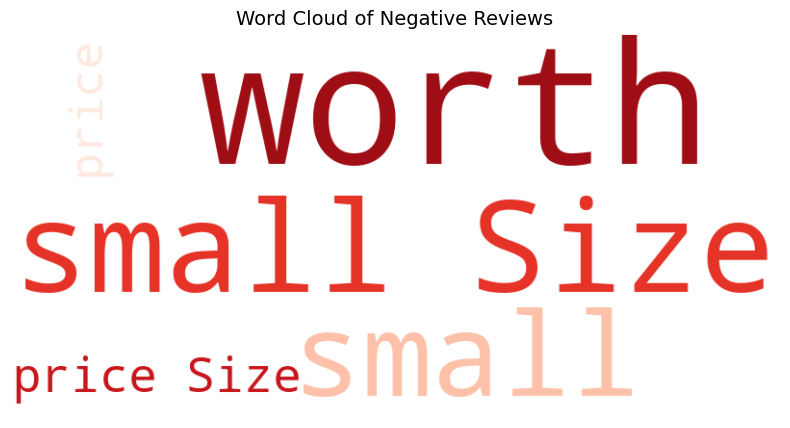

In [14]:
negative_reviews = " ".join(df[df["Sentiment"] < 0]["Review Text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Negative Reviews", fontsize=14)
plt.show()


### **Observation:**
The given code generates a **word cloud** for negative reviews by filtering the dataset based on the `"Sentiment"` column (where values are less than 0). It then combines all the negative review texts into a single string and visualizes the most frequently used words. The word cloud uses **red shades** to highlight common words, making it easier to identify recurring themes in negative feedback. The visualization helps to recognize common complaints, product issues, or dissatisfaction factors mentioned by customers.

### **Conclusion:**
From the word cloud, we can infer **key pain points** that customers face with women's clothing products. If certain words like **"poor," "small," "uncomfortable," "return," or "cheap"** appear frequently, it suggests common concerns related to product quality, sizing issues, or overall dissatisfaction. This insight can help businesses improve their products, address customer concerns, and enhance customer satisfaction by focusing on resolving the most mentioned problems.

### Make function for classify updated_score

In [15]:
classify = {'1':[-5,-4,-3.75,-3.25,3,-2.75,-2.50,-2.25,-2,-1.5,-1.25,-1,-0.75,-0.5,-0.25],
            '2':[-0.24,0.25,0.5,0.75,1] ,
            '3': [1.01,1.25,1.5,1.75,2],
            '4': [2.01,2.25,2.5,2.75,3],
            '5':[3.01,3.25,3.50,3.75,4,5]}

def fun(values):
    for i in classify:
        for j in classify[i]:
            if values == j:
                return i
            if values <= j:
                return i

### Apply function on updated_score and put into New_score column

In [16]:
df['New_score'] = df['Updated_score'].apply(fun)
df['New_score'] = pd.to_numeric(df['New_score'])
df

,User ID,Product Name,Rating,Review Text,Sentiment,Updated_score,New_score
0,0,Jacket,2,Highly recommended!,0.2000,0.4000,1
1,0,Dress,1,Would buy again!,0.0000,0.0000,1
2,1,Jeans,5,Perfect for summer.,1.0000,5.0000,5
3,2,Jacket,5,"Great quality, loved it!",0.8375,4.1875,5
4,3,T-shirt,3,Not worth the price.,-0.1500,-0.4500,1
...,...,...,...,...,...,...,...
6995,3495,Skirt,4,Highly recommended!,0.2000,0.8000,1
6996,3496,Jacket,2,Perfect for summer.,1.0000,2.0000,1
6997,3497,Blouse,2,Size was too small.,-0.2500,-0.5000,1
6998,3497,T-shirt,4,Size was too small.,-0.2500,-1.0000,1


### Pivot table of ClothingID, Unnamed and New_score

In [18]:
df_pivot = df.pivot_table(index='Product Name', columns='User ID', values='New_score').fillna(0)
df_pivot

User ID,0,1,2,3,4,5,6,7,8,9,...,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497
Product Name,,,,,,,,,,,,,,,,,,,,,
Blouse,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0
Dress,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Jacket,1.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Jeans,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Pants,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Shirt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Shorts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0
Skirt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Sweater,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Sparse Matrix (Compressed Sparse Row)

In [19]:
from scipy.sparse import csr_matrix

df_pivot_matrix = csr_matrix(df_pivot.values) 
print(df_pivot_matrix)

  (0, 6)	1.0
  (0, 9)	1.0
  (0, 13)	1.0
  (0, 42)	1.0
  (0, 43)	1.0
  (0, 47)	1.0
  (0, 49)	1.0
  (0, 51)	1.0
  (0, 58)	1.0
  (0, 60)	1.0
  (0, 61)	1.0
  (0, 68)	1.0
  (0, 70)	1.0
  (0, 76)	1.0
  (0, 82)	1.0
  (0, 84)	1.0
  (0, 88)	1.0
  (0, 91)	1.0
  (0, 98)	1.0
  (0, 103)	1.0
  (0, 113)	1.0
  (0, 121)	1.0
  (0, 126)	1.0
  (0, 134)	1.0
  (0, 141)	1.0
  :	:
  (9, 3386)	1.0
  (9, 3389)	1.0
  (9, 3390)	1.0
  (9, 3392)	1.0
  (9, 3395)	1.0
  (9, 3404)	1.0
  (9, 3419)	1.0
  (9, 3420)	1.0
  (9, 3426)	1.0
  (9, 3441)	3.0
  (9, 3444)	1.0
  (9, 3446)	1.0
  (9, 3448)	1.0
  (9, 3455)	1.0
  (9, 3457)	1.0
  (9, 3459)	1.0
  (9, 3464)	1.0
  (9, 3472)	1.0
  (9, 3473)	1.0
  (9, 3474)	1.0
  (9, 3480)	1.0
  (9, 3486)	1.0
  (9, 3493)	1.0
  (9, 3494)	5.0
  (9, 3497)	1.0


### Fitting data into NearestNeighborsModel

In [20]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'euclidean', n_neighbors=20, radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='euclidean', n_neighbors=20, radius=1)

In [21]:
print(df_pivot.var(axis=1).describe())  # Check if variance is too low


count    10.000000
mean      0.456427
std       0.056599
min       0.380029
25%       0.411988
50%       0.448160
75%       0.484328
max       0.552038
dtype: float64


In [22]:
from sklearn.preprocessing import normalize

df_pivot_normalized = normalize(df_pivot)
similarity_matrix = cosine_similarity(df_pivot_normalized)


### Matrix of cosine similarity

In [23]:
similarity_matrix = cosine_similarity(df_pivot_normalized)
similarity_matrix

array([[1.        , 0.09497946, 0.063083  , 0.07845273, 0.09661341,
        0.07499481, 0.12390588, 0.08024053, 0.09912021, 0.11979143],
       [0.09497946, 1.        , 0.10034341, 0.12318461, 0.07881294,
        0.09935584, 0.08403172, 0.11425724, 0.08170901, 0.14636038],
       [0.063083  , 0.10034341, 1.        , 0.09322775, 0.08796936,
        0.10294817, 0.0809017 , 0.0922841 , 0.07496551, 0.09353241],
       [0.07845273, 0.12318461, 0.09322775, 1.        , 0.13869564,
        0.08056811, 0.07773913, 0.08913187, 0.07387628, 0.10766778],
       [0.09661341, 0.07881294, 0.08796936, 0.13869564, 1.        ,
        0.07096391, 0.07595225, 0.09454885, 0.09894603, 0.10254065],
       [0.07499481, 0.09935584, 0.10294817, 0.08056811, 0.07096391,
        1.        , 0.09721134, 0.0978563 , 0.07731751, 0.11587408],
       [0.12390588, 0.08403172, 0.0809017 , 0.07773913, 0.07595225,
        0.09721134, 1.        , 0.08943288, 0.09571693, 0.09374223],
       [0.08024053, 0.11425724, 0.0922841

In [25]:
Product_Name= (input('Enter Product Name according to data set : '))
data = list(df_pivot.index)
print(data)

Enter Product Name according to data set :  Pants


['Blouse', 'Dress', 'Jacket', 'Jeans', 'Pants', 'Shirt', 'Shorts', 'Skirt', 'Sweater', 'T-shirt']


In [27]:
query_index = data.index(Product_Name) 
print(query_index)

4


In [28]:
similarity, indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 8)
print(similarity) 
print(indices) 

[[ 0.         55.96427432 56.08029957 56.43974171 56.59505279 57.4233789
  58.36094585 58.57473858]]
[[4 1 3 2 6 7 5 9]]


### Rating and Review-Based Recommendation System

In [29]:
data_dict={}
for i in range(0, len(similarity.flatten())):   

    if i == 0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        data_dict[str(df_pivot.index[indices.flatten()[i]])] = float(similarity.flatten()[i])
        print(f'{df_pivot.index[indices.flatten()[i]]}, is similarity distance = with {similarity.flatten()[i]:.20f}')

print(data_dict)

Recommendations for Pants:

Dress, is similarity distance = with 55.96427431853288680941
Jeans, is similarity distance = with 56.08029957123981290579
Jacket, is similarity distance = with 56.43974171135481299189
Shorts, is similarity distance = with 56.59505278732408584119
Skirt, is similarity distance = with 57.42337890131896926960
Shirt, is similarity distance = with 58.36094584565949361377
T-shirt, is similarity distance = with 58.57473858242988029588
{'Dress': 55.96427431853289, 'Jeans': 56.08029957123981, 'Jacket': 56.43974171135481, 'Shorts': 56.595052787324086, 'Skirt': 57.42337890131897, 'Shirt': 58.360945845659494, 'T-shirt': 58.57473858242988}


In [30]:
df['Sentiment Rating'] = np.interp(df['Sentiment'], (-1, 1), (1, 5))
df['Final Score'] = (df['Rating'] * 0.6) + (df['Sentiment Rating'] * 0.4) 

In [31]:
def categorize_rating(score):
    if score >= 4.5:
        return 5
    elif score >= 3.5:
        return 4
    elif score >= 2.5:
        return 3
    elif score >= 1.5:
        return 2
    else:
        return 1

# Apply categorization
df['Updated Rating'] = df['Final Score'].apply(categorize_rating)
df

,User ID,Product Name,Rating,Review Text,Sentiment,Updated_score,New_score,Sentiment Rating,Final Score,Updated Rating
0,0,Jacket,2,Highly recommended!,0.2000,0.4000,1,3.400,2.56,3
1,0,Dress,1,Would buy again!,0.0000,0.0000,1,3.000,1.80,2
2,1,Jeans,5,Perfect for summer.,1.0000,5.0000,5,5.000,5.00,5
3,2,Jacket,5,"Great quality, loved it!",0.8375,4.1875,5,4.675,4.87,5
4,3,T-shirt,3,Not worth the price.,-0.1500,-0.4500,1,2.700,2.88,3
...,...,...,...,...,...,...,...,...,...,...
6995,3495,Skirt,4,Highly recommended!,0.2000,0.8000,1,3.400,3.76,4
6996,3496,Jacket,2,Perfect for summer.,1.0000,2.0000,1,5.000,3.20,3
6997,3497,Blouse,2,Size was too small.,-0.2500,-0.5000,1,2.500,2.20,2
6998,3497,T-shirt,4,Size was too small.,-0.2500,-1.0000,1,2.500,3.40,3


### Difference of Rating and Updated Rating

In [32]:
df_ratings = df[['Rating',  'Final Score', 'Updated Rating']]
df_ratings.head()

,Rating,Final Score,Updated Rating
0,2,2.56,3
1,1,1.80,2
2,5,5.00,5
3,5,4.87,5
4,3,2.88,3


### Pivot table of Recommended IND,Class Name and final_score

In [34]:
df_pivot_de = df[df['Product Name'].notnull()].pivot_table(
    index='Product Name',
    columns='Review Text',
    values='Final Score'
).fillna(0)
df_pivot_de

Review Text,Amazing fit and stylish.,Color faded after first wash.,Fabric is soft and comfortable.,"Great quality, loved it!",Highly recommended!,Material feels cheap.,Not worth the price.,Perfect for summer.,Size was too small.,Would buy again!
Product Name,,,,,,,,,,
Blouse,3.329412,3.077551,2.951724,3.832857,3.087027,3.167059,2.850968,3.813953,2.785542,3.016901
Dress,3.400000,3.128947,3.372727,3.540270,3.043871,3.479184,2.895584,3.692000,2.936957,2.887059
Jacket,3.407500,3.179661,3.028571,3.547966,3.091818,3.208136,2.946667,3.608000,2.682353,3.178378
Jeans,3.506452,3.298182,2.872000,3.470000,3.160000,3.620000,2.932632,3.654945,3.065823,2.707317
Pants,3.061818,3.093548,3.432836,3.545325,3.232527,3.238919,2.939259,3.668750,2.857831,3.070130
Shirt,3.400000,3.050000,3.073684,3.824054,3.202857,3.396190,2.763871,3.735385,2.826471,2.782609
Shorts,3.323810,3.253933,3.078481,3.475882,3.261695,3.189565,2.750588,3.944444,2.864000,3.056757
Skirt,3.005263,3.273171,3.374545,3.534789,2.960000,3.393973,3.052500,3.607407,2.700000,2.857895
Sweater,3.515385,3.113333,3.285714,3.838750,3.144211,3.361667,2.713333,3.924390,2.902857,2.978947


In [35]:
df_pivot_normalized = normalize(df_pivot_de)

### Convert the normalized pivot data into a sparse matrix for efficiency.

In [36]:
df_pivot_matrix = csr_matrix(df_pivot_normalized)

In [37]:
model_knn = NearestNeighbors(metric='euclidean', n_neighbors=20, radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='euclidean', n_neighbors=20, radius=1)

In [38]:
similarity_matrix = cosine_similarity(df_pivot_normalized)
print("Similarity Matrix:\n", similarity_matrix)

Similarity Matrix:
 [[1.         0.99803098 0.99906359 0.99700691 0.99783834 0.99925375
  0.9988727  0.99711859 0.99926287 0.99757152]
 [0.99803098 1.         0.99841052 0.99819632 0.99881588 0.99883169
  0.99828655 0.99882816 0.99903633 0.99922915]
 [0.99906359 0.99841052 1.         0.9972071  0.9982975  0.99824247
  0.9988621  0.99776716 0.99840887 0.99804219]
 [0.99700691 0.99819632 0.9972071  1.         0.99578664 0.99815847
  0.99736736 0.99641171 0.99720034 0.99684207]
 [0.99783834 0.99881588 0.9982975  0.99578664 1.         0.99775278
  0.99837722 0.99897042 0.99808677 0.99875346]
 [0.99925375 0.99883169 0.99824247 0.99815847 0.99775278 1.
  0.99839837 0.99734271 0.99954875 0.99816515]
 [0.9988727  0.99828655 0.9988621  0.99736736 0.99837722 0.99839837
  1.         0.9972114  0.99885975 0.99723848]
 [0.99711859 0.99882816 0.99776716 0.99641171 0.99897042 0.99734271
  0.9972114  1.         0.99728451 0.99871   ]
 [0.99926287 0.99903633 0.99840887 0.99720034 0.99808677 0.99954875


### Display Available Class Names

In [39]:
data = list(df_pivot_de.index)
print("Available Product Names:")
print(data)

Available Product Names:
['Blouse', 'Dress', 'Jacket', 'Jeans', 'Pants', 'Shirt', 'Shorts', 'Skirt', 'Sweater', 'T-shirt']


In [40]:
class_input = input('Enter Product name according to data set: ')
try:
    query_index = data.index(class_input)
except ValueError:
    print("Invalid class name.")
    exit()
similarity, indices = model_knn.kneighbors(
    df_pivot_normalized[query_index].reshape(1, -1),
    n_neighbors=8
)
print("\nSimilarity distances:")
print(similarity)
print("Indices:")
print(indices)

Enter Product name according to data set:  Jeans



Similarity distances:
[[0.         0.06006128 0.06068819 0.07256231 0.07473824 0.07482862
  0.07737038 0.07947241]]
Indices:
[[3 1 5 6 2 8 0 9]]


### Rating and Review-Based Recommendation System for Class name 

In [44]:
data_dict = {}
for i in range(0, len(similarity.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        class_name = df_pivot.index[indices.flatten()[i]]
        data_dict[str(class_name)] = float(similarity.flatten()[i])
        print(f'{class_name}, is similarity distance = with {similarity.flatten()[i]:.20f}')
recommendations_df = pd.DataFrame(list(data_dict.items()), columns=['Class Name', 'Similarity Distance'])
print("\nRecommendation DataFrame:")
recommendations_df


Recommendations for Jeans:

Dress, is similarity distance = with 0.06006128206647290413
Shirt, is similarity distance = with 0.06068819047196737093
Shorts, is similarity distance = with 0.07256231159969366018
Jacket, is similarity distance = with 0.07473823996805099845
Sweater, is similarity distance = with 0.07482861728200047857
Blouse, is similarity distance = with 0.07737037788048893583
T-shirt, is similarity distance = with 0.07947240887964325540

Recommendation DataFrame:


,Class Name,Similarity Distance
0,Dress,0.060061
1,Shirt,0.060688
2,Shorts,0.072562
3,Jacket,0.074738
4,Sweater,0.074829
5,Blouse,0.077370
6,T-shirt,0.079472
